# The timeline of a winter olympic athlete
The winter olympics are a collection of athletic events that are held once every four years. This year, the winter olympics are being hosted in Milano and Cortina, Italy. Since the first Winter Olympics in 1924, thousands of athletes have competed in a multitude of disciplines. Some of them might have also had an olympic career. What can we say about the success stories of people who competed in multiple olympic games?

![By Eileen - originally posted to Flickr as I can't believe I was here...., CC BY 2.0, https://commons.wikimedia.org/w/index.php?curid=9528796](img/winterpodium.jpg)

## Repeating Athletes
For a lot of athletes, the olympic games represent the peak of their athletic career. Nevertheless, some of them might have started competing at such a young age that they're able to participate in multiple instances of the olympic games. We can take look at a database of the winter olympics to find out which athletes have participated in more than one event.

In [4]:
# Set Up
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
# Load Data
wolympics_df = pd.read_csv('data/winter_olympics_medals.csv')
# Sample row
wolympics_df.sample(1)

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
39576,2002.0,Winter,Ice Hockey (Ice Hockey),"Ice Hockey, Men (Olympic)",Mathias Seger,102297,SUI,Switzerland,11.0,False,NaN


As we see, the database contains some of the important information regarding athlete's participation in the olympic games. Then, we can use the athlete id to find out which athletes have competed in more than one event.

In [9]:
# Select athletes who have participated in more than one event
multiple_event_ath = wolympics_df.value_counts('athlete_id').to_frame().query('count>1').reset_index()
# Filter database to leave only athletes who have competed multiple events
filtered_olympics = wolympics_df[
    wolympics_df['athlete_id'].isin(multiple_event_ath['athlete_id'])
]
# Show a few columns of the filtered data
filtered_olympics.head(10)

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
2,1924.0,Winter,Bobsleigh (Bobsleigh),"Four/Five, Men (Olympic)",Charley Stoffel,12796,SUI,Switzerland 2,NaN,False,NaN
3,1928.0,Winter,Bobsleigh (Bobsleigh),"Four/Five, Men (Olympic)",Charley Stoffel,12796,SUI,Switzerland 1,8.0,False,NaN
5,2002.0,Winter,Speed Skating (Skating),"3,000 metres, Women (Olympic)",Clara Hughes,13139,CAN,NaN,10.0,False,NaN
6,2002.0,Winter,Speed Skating (Skating),"5,000 metres, Women (Olympic)",Clara Hughes,13139,CAN,NaN,3.0,False,Bronze
7,2006.0,Winter,Speed Skating (Skating),"3,000 metres, Women (Olympic)",Clara Hughes,13139,CAN,NaN,9.0,False,NaN
8,2006.0,Winter,Speed Skating (Skating),"5,000 metres, Women (Olympic)",Clara Hughes,13139,CAN,NaN,1.0,False,Gold
9,2006.0,Winter,Speed Skating (Skating),"Team Pursuit (6 laps), Women (Olympic)",Clara Hughes,13139,CAN,Canada,2.0,False,Silver
10,2010.0,Winter,Speed Skating (Skating),"3,000 metres, Women (Olympic)",Clara Hughes,13139,CAN,NaN,5.0,False,NaN
11,2010.0,Winter,Speed Skating (Skating),"5,000 metres, Women (Olympic)",Clara Hughes,13139,CAN,NaN,3.0,False,Bronze
12,1924.0,Winter,Cross Country Skiing (Skiing),"18 kilometres, Men (Olympic)",Roberts Plūme,16155,LAT,NaN,NaN,False,NaN


From this filtered data, we see that Charley Stoffel participated in the Olympic Games of 1924 and 1928. On the other hand, Clara Hughes participated for 3 olympic games: 2002, 2006, and 2010. Nevertheless, there are 7 entries since she competed in multiple events during the same year. If we take her story as an example, we can see that she won a Bronze medal on her first games, a gold and silver medals on her second games, and a bronze medal on her last games. Does that mean that there is a point where her performance just wouldn't improve?

## Athletes Across Multiple Years
Since we are interested in the difference of performance between the same athlete across the years, we want to only showcase the athletes who competed in more than one year. Moreover, to be charitable with them, we might want to take their best performance at a year in case they participated in more than one event in a single year. In our example with Clara Hughes, she participated in two events in the Winter Olympics of 2002, but she placed 10th on one event and 3rd on the other.

In [11]:
# Group by athlete, name and year, then find the minimum (best) place
best_per_year = filtered_olympics.groupby(['as', 'athlete_id', 'year'])['place'].min().reset_index()

# Clean up the Year and Place (converting 1924.0 to 1924)
best_per_year['year'] = best_per_year['year'].astype(int)

best_per_year.head()

,as,athlete_id,year,place
0,A J Kitt,87997,1988,26.0
1,A J Kitt,87997,1992,9.0
2,A J Kitt,87997,1994,17.0
3,A J Kitt,87997,1998,NaN
4,A. J. Mleczko,100464,1998,1.0


With this new visualization we can see how people's performance has fluctuated throughout the years. For A J Kitt, his peak performance was during his 2nd Winter Olympics. We see that he declined after that until he did not place on his last year. Looking at him specifically, A J Kitt was born in 1968 which means he was 20 for his first Winter Olympics and 32 for his last. Particularly, he was 24 years old for his peak olympic performance.

Surprisingly, some people have competed for up to 8 years, and at least 8 people have competed for at least 7 years.

In [12]:
best_per_year.groupby(['as', 'athlete_id']).size().reset_index(name='games_count').sort_values(by='games_count', ascending=False).head(10)

,as,athlete_id,games_count
9900,Noriaki Kasai,87815,8
2406,Claudia Pechstein,82053,8
11862,Simon Ammann,99870,7
11790,Siarhei Dalidovich,85250,7
5608,Janne Ahonen,83500,7
172,Albert Demchenko,85156,7
846,Andrus Veerpalu,98596,6
6994,Kim Hyeon-Gi,99880,6
12533,Teemu Selänne,97424,6
3582,Eva Tofalvi,99564,6


We can look at the athletes who have participated in 7 or more winter olympics to see what their performance has been like.

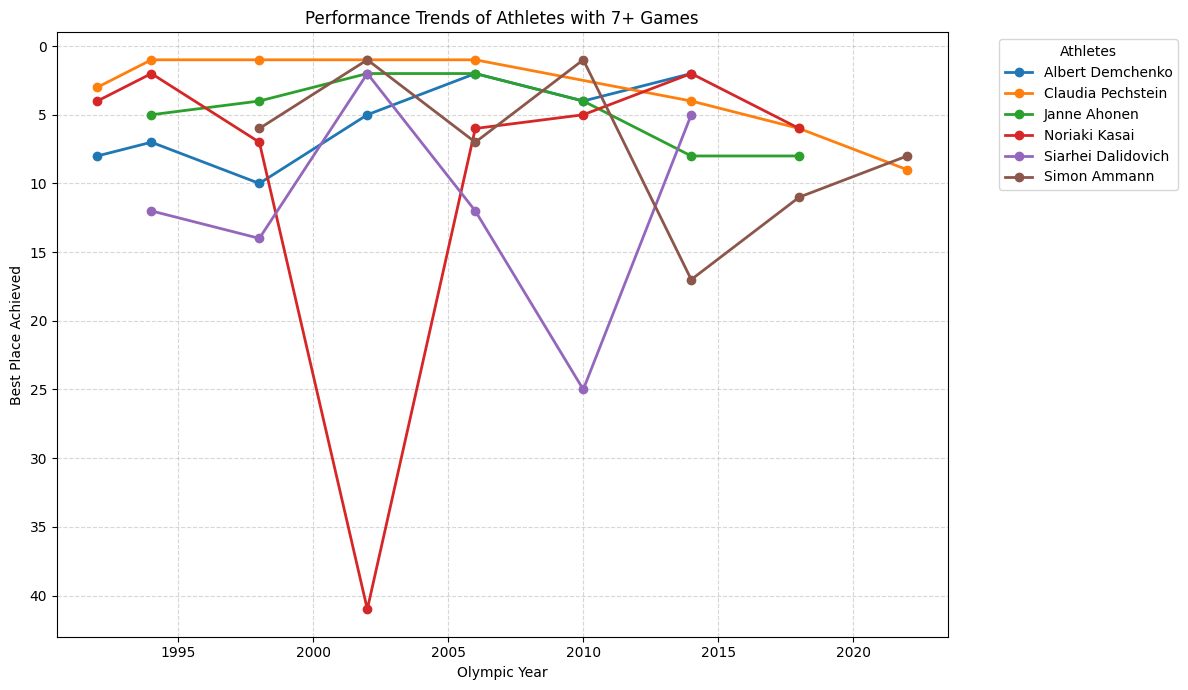

In [14]:
# Identify IDs of athletes who competed in 7 or more years
veteran_ids = best_per_year.groupby('athlete_id').size()
veteran_ids = veteran_ids[veteran_ids >= 7].index

# Filter the data and remove NaN places for the plot
plot_df = best_per_year[best_per_year['athlete_id'].isin(veteran_ids)].dropna(subset=['place'])

# 3. Create the plot
plt.figure(figsize=(12, 7))

for athlete_id in plot_df['athlete_id'].unique():
    subset = plot_df[plot_df['athlete_id'] == athlete_id]
    athlete_name = subset['as'].iloc[0]
    
    plt.plot(subset['year'], subset['place'], marker='o', linewidth=2, label=athlete_name)

# 4. Styling
plt.gca().invert_yaxis()  # Best results at the top
plt.xlabel('Olympic Year')
plt.ylabel('Best Place Achieved')
plt.title('Performance Trends of Athletes with 7+ Games')
plt.legend(title="Athletes", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Of the athletes who have competed in 7 or more games, we can see that all of them started competing later than 1992. A contributing factor to their number of participations might be that there were Winter Olympics held on 1992 and 1994 due to the schedule change to hold the Winter Olympics in different years that the summer Olympics. Out of these 6 athletes, we can see that Pechstein, Ahonen, and Demchenko had a relatively stable olympic career. Contrastingly, Kasai, Dalidovich, and Ammann had a more tumultuous olympic career. Investigating further into these 6 athletes can tell us more about their olympic career.

In [15]:
# Load biographical data
bios = pd.read_csv('data/bios.csv')
# Extract data from the 6 athletes
bios.query('athlete_id in @veteran_ids')

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
81401,82053,Claudia Pechstein,1972-02-22,Ost-Berlin (East Berlin),Berlin,GER,Germany,166.0,61.0,NaN
82843,83500,Janne Ahonen,1977-05-11,Lahti,Päijät-Häme,FIN,Finland,184.0,66.0,NaN
84482,85156,Albert Demchenko,1971-11-27,Chusovoy,Perm Kray,RUS,Russian Federation Unified Team,185.0,95.0,NaN
84574,85250,Siarhei Dalidovich,1973-05-18,Orsha,Vitebsk,BLR,Belarus,175.0,68.0,NaN
87119,87815,Noriaki Kasai,1972-06-06,Shimokawa,Hokkaido,JPN,Japan,176.0,60.0,NaN
99074,99870,Simon Ammann,1981-06-25,Grabs,Sankt Gallen,SUI,Switzerland,171.0,55.0,NaN


Surprisingly, all athletes are from different countries, but also countries that normally succeed in the Winter Olympics. Additionally, it seems like none of these athletes stayed around for the 2026 Olympics. [Claudia Pechstein retired in 2025](https://sports.yahoo.com/article/german-top-speed-skater-pechstein-112113960.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAKliQjHFMNXnpxdGmWSCDn2oGlcm1Yjj_7HZXfGwfG6yUQ238Pi15aEchdFs7PNe8OyKhBQUQBciVADb3jKjDpNeWNDbjMjvxE7C0-qEBEXEuS8Ga2SU46Wfybm3L8ZCb8q03rzCM9D6tux28P_lgPjBqkkVoW9X5TtacYN2_P-R) and [Simon Amman did not make the 2026 Switzerland Olympic team](https://www.msn.com/en-us/sports/other/switzerland-leaves-44-year-old-ski-jump-great-simon-ammann-off-winter-olympics-team/ar-AA1V02zp). Lastly, these 6 veterans played a variety of sports. Speed Skating: Claudia Perchstein; Ski Jumping: Janne Anohen, Simon Ammann, Noriaki Kasa; Luge: Albert Demchenko; Cross Country Ski: Siarhei Dalidovich.
Having 3 veterans (7+ olympics) in ski jumping might symbolize that it has more opportunities of winning even as an older athlete.